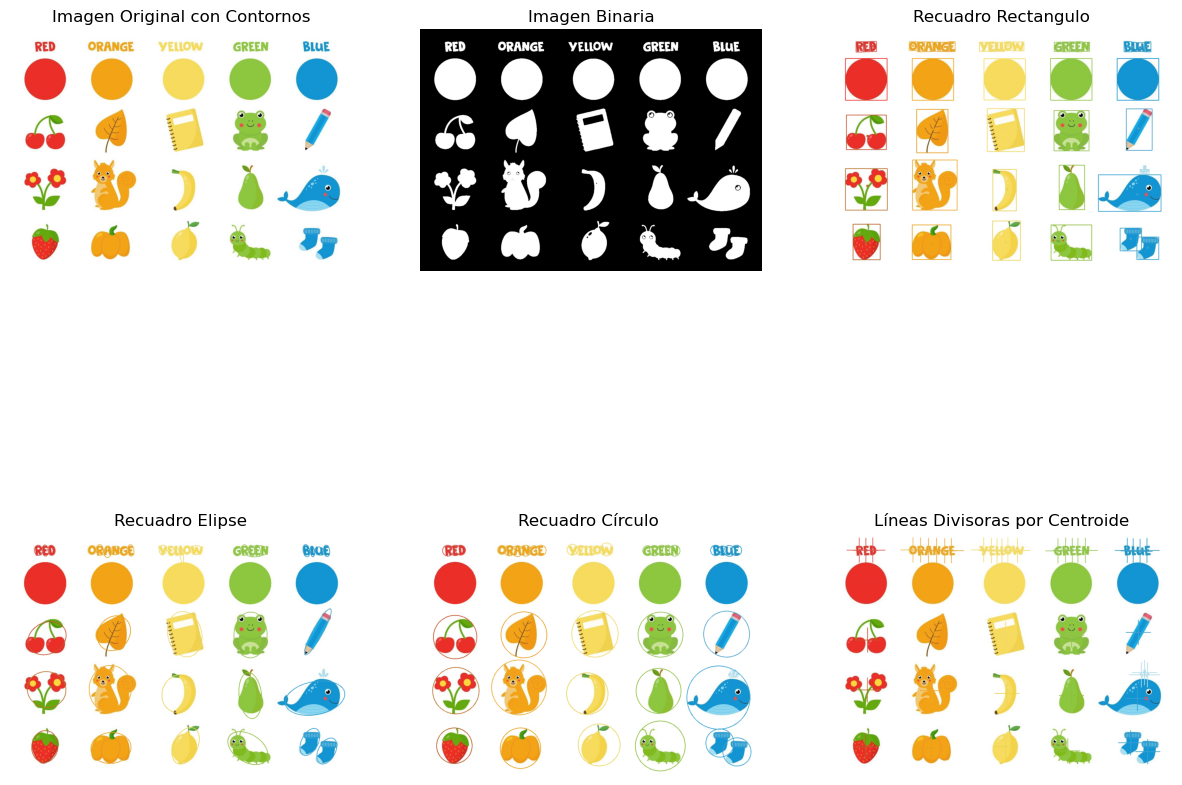

Contorno 1: Perímetro = 321.62, Área = 5147.00
Contorno 2: Perímetro = 322.21, Área = 5138.50
Contorno 3: Perímetro = 726.14, Área = 9428.50
Contorno 4: Perímetro = 579.77, Área = 14821.50
Contorno 5: Perímetro = 444.13, Área = 10512.00
Contorno 6: Perímetro = 533.04, Área = 10252.00
Contorno 7: Perímetro = 741.21, Área = 21217.00
Contorno 8: Perímetro = 44.63, Área = 79.00
Contorno 9: Perímetro = 43.46, Área = 83.00
Contorno 10: Perímetro = 521.45, Área = 7166.00
Contorno 11: Perímetro = 1045.32, Área = 11306.00
Contorno 12: Perímetro = 70.63, Área = 185.00
Contorno 13: Perímetro = 568.11, Área = 11140.50
Contorno 14: Perímetro = 1071.32, Área = 22022.00
Contorno 15: Perímetro = 954.21, Área = 10792.00
Contorno 16: Perímetro = 657.33, Área = 17974.00
Contorno 17: Perímetro = 578.90, Área = 12706.00
Contorno 18: Perímetro = 436.56, Área = 6197.00
Contorno 19: Perímetro = 606.03, Área = 18395.50
Contorno 20: Perímetro = 556.46, Área = 21798.50
Contorno 21: Perímetro = 558.36, Área = 221

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

imagen = cv2.imread('colores.jpg')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

ret, bin = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)
contorno, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimitros = []
areas = []

imagen_rect = imagen.copy()
imagen_ellipse = imagen.copy()
imagen_circle = imagen.copy()
imagen_divider = imagen.copy()

for i in range(len(contorno)):
    cot = contorno[i]
    momento = cv2.moments(cot)
    
    if momento['m00'] != 0:
        cx = int(momento['m10'] / momento['m00'])
        cy = int(momento['m01'] / momento['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(cot)
    perimitro = cv2.arcLength(cot, True)

    perimitros.append(perimitro)
    areas.append(area)

    # Obtener el color del objeto (promedio dentro del contorno)
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cot], -1, 255, -1)
    mean_val = cv2.mean(imagen, mask=mask)
    color = tuple(int(v) for v in mean_val[:3]) 
    
    cv2.circle(imagen_rect, (cx, cy), 5, color, -1)
    
    x, y, w, h = cv2.boundingRect(cot)
    cv2.rectangle(imagen_rect, (x, y), (x + w, y + h), color, 2)

    if len(cot) >= 5:
        ellipse = cv2.fitEllipse(cot)
        cv2.ellipse(imagen_ellipse, ellipse, color, 2)

    (x_circ, y_circ), radius = cv2.minEnclosingCircle(cot)
    center_circle = (int(x_circ), int(y_circ))
    radius = int(radius)
    cv2.circle(imagen_circle, center_circle, radius, color, 2)

    cv2.line(imagen_divider, (cx - 50, cy), (cx + 50, cy), color, 2)  # horizontal
    cv2.line(imagen_divider, (cx, cy - 50), (cx, cy + 50), color, 2)  # vertical

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original con Contornos')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bin, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(imagen_rect, cv2.COLOR_BGR2RGB))
plt.title('Recuadro Rectangulo')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(imagen_ellipse, cv2.COLOR_BGR2RGB))
plt.title('Recuadro Elipse')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(imagen_circle, cv2.COLOR_BGR2RGB))
plt.title('Recuadro Círculo ')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(imagen_divider, cv2.COLOR_BGR2RGB))
plt.title('Líneas Divisoras por Centroide')
plt.axis('off')


plt.show()

for i, (perimitro, area) in enumerate(zip(perimitros, areas)):
    print(f'Contorno {i+1}: Perímetro = {perimitro:.2f}, Área = {area:.2f}')


Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 4.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.83, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 1.00, Perímetro: 4.00, Centroide: (452,2558)
Área: 2.00, Perímetro: 6.83, Centroide: (448,2558)
Área: 1.00, Perímetro: 4.83, Centroide: (270,2558)
Área: 0.50, Perímetro: 3.41, Centroide: (158,2558)
Área: 0.00, Perímetro: 0.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Perímetro: 2.00, Centroide: (0,0)
Área: 0.00, Pe

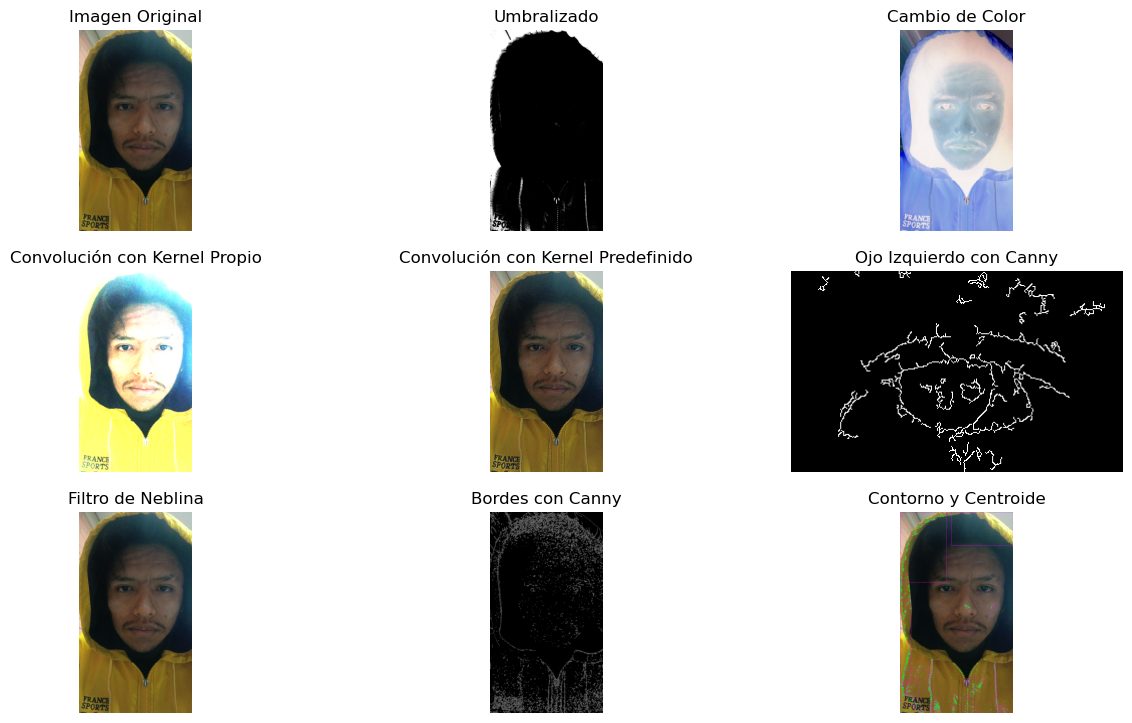

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rostro_J.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, umbra = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

cambio_color = cv2.bitwise_not(img)

kernel_propio = np.array([[0, 1, 0],
                          [1, 0, 1],
                          [0, 1, 0]])

convol_prop = cv2.filter2D(img, -1, kernel_propio)

kernel_Sharpen = np.array([[-2, -1, 0],
                            [-1, 1, 1],
                            [0, 1, 2]])
convol_predef = cv2.filter2D(img, -1, kernel_Sharpen)

eye_left_roi = img[850:1050,920:1250,:]
eye_left_gray = cv2.cvtColor(eye_left_roi, cv2.COLOR_BGR2GRAY)
eye_left_blur = cv2.GaussianBlur(eye_left_gray, (5, 5), 0)
edges = cv2.Canny(eye_left_blur, 25, 70)

def blur_2(imagen, mask, blur):
    fonde = cv2.GaussianBlur(imagen, (51, 51), 0)
    fin = np.where(mask[:,:,None]>0, imagen, fonde)
    return fin

_, mascara = cv2.threshold(gray, 100, 125, cv2.THRESH_BINARY_INV)
mascara = cv2.bitwise_not(mascara)
mascara = cv2.GaussianBlur(mascara, (21, 21), 0)
blur = 25
resultado = blur_2(img, mascara, blur)

edges1 = cv2.Canny(gray, 50, 150)

_, bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contorno, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimitros = []
areas = []
img_copy = img.copy()

contours, _ = cv2.findContours(umbra, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
analyzed = img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(analyzed, (x, y), (x + w, y + h), (255, 0, 255), 2)  # Rosa
    cv2.circle(analyzed, (cx, cy), 5, (0, 255, 0), -1)
    print(f"Área: {area:.2f}, Perímetro: {perimeter:.2f}, Centroide: ({cx},{cy})")

plt.figure(figsize=(15, 12))

plt.subplot(4, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(cv2.cvtColor(umbra, cv2.COLOR_BGR2RGB))
plt.title('Umbralizado')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(cv2.cvtColor(cambio_color, cv2.COLOR_BGR2RGB))
plt.title('Cambio de Color')
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(cv2.cvtColor(convol_prop, cv2.COLOR_BGR2RGB))
plt.title('Convolución con Kernel Propio')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(cv2.cvtColor(convol_predef, cv2.COLOR_BGR2RGB))
plt.title('Convolución con Kernel Predefinido')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Ojo Izquierdo con Canny')
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title('Filtro de Neblina')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(edges1, cmap='gray')
plt.title('Bordes con Canny')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(cv2.cvtColor(analyzed, cv2.COLOR_BGR2RGB))
plt.title('Contorno y Centroide')
plt.axis('off')

plt.show()


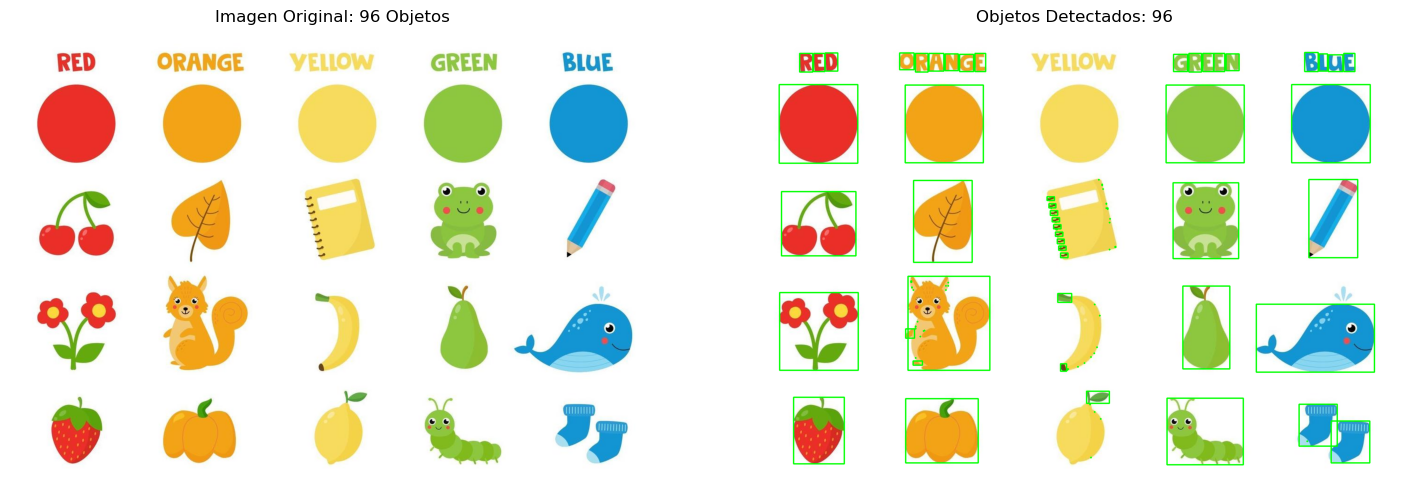

Objetos encontrados: 96


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('colores.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binaria = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_objetos = len(contornos)

img_contornos = img.copy()

for i, contorno in enumerate(contornos):
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(img_contornos, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Rectángulo verde

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {num_objetos} Objetos')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Objetos Detectados: {num_objetos}')
plt.imshow(cv2.cvtColor(img_contornos, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Objetos encontrados: {num_objetos}')
